# COMP4660/8420 Introduction to Fuzzy Logic

## Part 2: Introduction to scikit-fuzzy

Now it’s time to apply the concepts to some examples using a Python package called [scikit-fuzzy](http://pythonhosted.org/scikit-fuzzy/). Working through these
practical examples will help to develop your understanding.

### Task 1: Fuzzy Inference System for a Temperature Control System

*Goal: *Understand and implement a basic inference system in scikit-fuzzy.

Your first task is to build a Mamdani style inference system. You may find [this link](http://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html) to be helpful for you understanding scikit-fuzzy. To get started, please run 

`pip install scikit-fuzzy`

to install scikit-fuzzy on your machine. 

We will work through another example which is a basic temperature control system that
was discussed in the lectures

### 1. Import all the packages that you will need during this lab.

In [1]:
# ==================================
# A Temperature Control System - The Hard Way
# ==================================

#  Note: This method computes everything by hand, step by step. For most people,
#  the new API for fuzzy systems will be preferable. The same problem is solved
#  with the new API `in this example <./plot_tipping_problem_newapi.html>`_.

# Input variables
# ---------------

# A number of variables play into the decision about how much power while
# dining. Consider one item:

# * ``temp`` : Temperature

# Output variable
# ---------------

# The output variable is simply the power, in percentage points:

# * ``power`` : Percent of power


# For the purposes of discussion, let's say we need 'cold', 'pleasant', and 'hot' 
# for input variables as well as 'high', 'medium', and 'low' membership functions 
# for output variable. These are defined in scikit-fuzzy as follows

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Generate universal variables 

In [3]:
# Generate universe variables
#   * Temperature ranges [0, 45]
#   * Power has a range of [0, 100]

x_temp = np.arange(0, 45, 1)
x_power = np.arange(0, 100, 1)

### 3. Generate fuzzy membership functions

In [4]:
# Generate fuzzy membership functions
temp_cold = fuzz.trimf(x_temp, [0, 0, 10])
temp_cool = fuzz.trimf(x_temp, [0, 13, 18])
temp_pleasant = fuzz.trimf(x_temp, [15, 18, 20])
temp_warm = fuzz.trimf(x_temp, [18, 23, 28])
temp_hot = fuzz.trimf(x_temp, [25, 30, 40])

power_min = fuzz.trimf(x_power, [0, 0, 30])
power_low = fuzz.trimf(x_power, [10, 30, 50])
power_mid = fuzz.trimf(x_power, [40, 50, 60])
power_fast = fuzz.trimf(x_power, [50, 70, 90])
power_blast = fuzz.trimf(x_power, [70, 100, 100])

In [5]:
# This is for visualization purposes.
power0 = np.zeros_like(x_power)

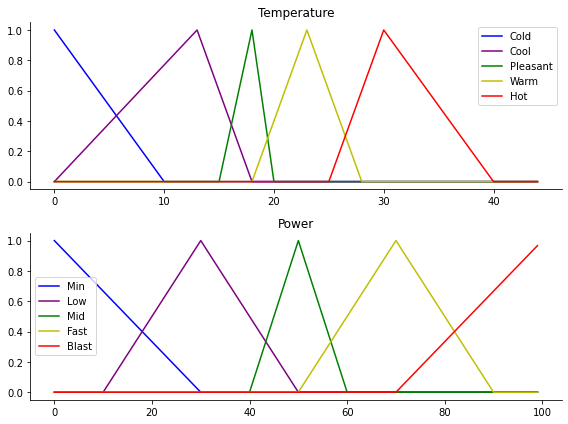

In [6]:
# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 6))

ax0.plot(x_temp, temp_cold, 'b', linewidth=1.5, label='Cold')
ax0.plot(x_temp, temp_cool, 'purple', linewidth=1.5, label='Cool')
ax0.plot(x_temp, temp_pleasant, 'g', linewidth=1.5, label='Pleasant')
ax0.plot(x_temp, temp_warm, 'y', linewidth=1.5, label='Warm')
ax0.plot(x_temp, temp_hot, 'r', linewidth=1.5, label='Hot')
ax0.set_title('Temperature')
ax0.legend()

ax1.plot(x_power, power_min, 'b', linewidth=1.5, label='Min')
ax1.plot(x_power, power_low, 'purple', linewidth=1.5, label='Low')
ax1.plot(x_power, power_mid, 'g', linewidth=1.5, label='Mid')
ax1.plot(x_power, power_fast, 'y', linewidth=1.5, label='Fast')
ax1.plot(x_power, power_blast, 'r', linewidth=1.5, label='Blast')
ax1.set_title('Power')
ax1.legend()

for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [7]:
# Fuzzy rules
# -----------

# Now, to make these triangles useful, we define the *fuzzy relationship*
# between input and output variables. For the purposes of our example, consider
# three simple rules:

# 1. If (Temp is Cold) then (Power is Low)
# 2. If (Temp is Pleasant) then (Power is Med)
# 3. If (Temp is Hot) then (Power is High)

# Most people would agree on these rules, but the rules are fuzzy. Mapping the
# imprecise rules into a defined, actionable power is a challenge. This is the
# kind of task at which fuzzy logic excels.

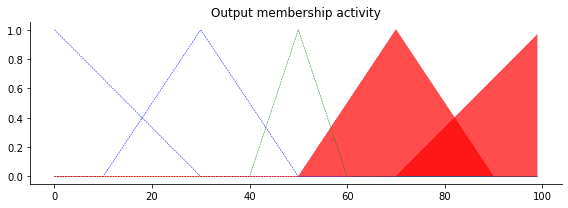

In [8]:
def apply_rule_to_get_activation_values(temp, visualizing=False):
    temp_level_cold = fuzz.interp_membership(x_temp, temp_cold, temp)
    temp_level_cool = fuzz.interp_membership(x_temp, temp_cool, temp)
    temp_level_pleasant = fuzz.interp_membership(x_temp, temp_pleasant, temp)
    temp_level_warm = fuzz.interp_membership(x_temp, temp_warm, temp)
    temp_level_hot = fuzz.interp_membership(x_temp, temp_hot, temp)

    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    power_activation_min = np.fmin(temp_level_cold, power_min)
    power_activation_low = np.fmin(temp_level_cold, power_low)
    power_activation_mid = np.fmin(temp_level_pleasant, power_mid)
    power_activation_fast = np.fmin(temp_level_hot, power_fast)
    power_activation_blast = np.fmin(temp_level_hot, power_blast)

    # Visualize this
    if visualizing:
        fig, ax0 = plt.subplots(figsize=(8, 3))

        ax0.fill_between(x_power, power0, power_activation_min, facecolor='b', alpha=0.7)
        ax0.plot(x_power, power_min, 'b', linewidth=0.5, linestyle='--', )
        ax0.fill_between(x_power, power0, power_activation_low, facecolor='b', alpha=0.7)
        ax0.plot(x_power, power_low, 'b', linewidth=0.5, linestyle='--', )
        ax0.fill_between(x_power, power0, power_activation_mid, facecolor='g', alpha=0.7)
        ax0.plot(x_power, power_mid, 'g', linewidth=0.5, linestyle='--')
        ax0.fill_between(x_power, power0, power_activation_fast, facecolor='r', alpha=0.7)
        ax0.plot(x_power, power_fast, 'r', linewidth=0.5, linestyle='--')
        ax0.fill_between(x_power, power0, power_activation_blast, facecolor='r', alpha=0.7)
        ax0.plot(x_power, power_blast, 'r', linewidth=0.5, linestyle='--')
        ax0.set_title('Output membership activity')

        # Turn off top/right axes
        for ax in (ax0,):
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()

        plt.tight_layout()
        plt.show()

    return power_activation_min, power_activation_low, power_activation_mid, power_activation_fast, power_activation_blast

fuzzifications = apply_rule_to_get_activation_values(30, True)

In [9]:
# Defuzzification
# ---------------
# Finally, to get a real world answer, we return to *crisp* logic from the
# world of fuzzy membership functions. For the purposes of this example
# the centroid method will be used.

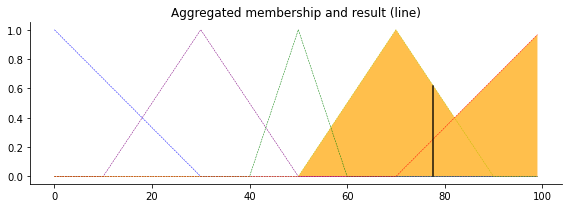

In [10]:
def defuzzify(fuzzifications, visualizing=False):
    # Aggregate all three output membership functions together
    aggregated = np.fmax.reduce(fuzzifications)

    # Calculate defuzzified result
    power = fuzz.defuzz(x_power, aggregated, 'centroid')
    power_activation = fuzz.interp_membership(x_power, aggregated, power)  # for plot

    # Visualize this
    if visualizing:
        fig, ax0 = plt.subplots(figsize=(8, 3))

        ax0.plot(x_power, power_min, 'b', linewidth=0.5, linestyle='--', )
        ax0.plot(x_power, power_low, 'purple', linewidth=0.5, linestyle='--', )
        ax0.plot(x_power, power_mid, 'g', linewidth=0.5, linestyle='--')
        ax0.plot(x_power, power_fast, 'y', linewidth=0.5, linestyle='--')
        ax0.plot(x_power, power_blast, 'r', linewidth=0.5, linestyle='--')
        ax0.fill_between(x_power, power0, aggregated, facecolor='Orange', alpha=0.7)
        ax0.plot([power, power], [0, power_activation], 'k', linewidth=1.5, alpha=0.9)
        ax0.set_title('Aggregated membership and result (line)')

        # Turn off top/right axes
        for ax in (ax0,):
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()

        plt.tight_layout()
        plt.show()

defuzzify(fuzzifications, True)

#### Q1. What are the linguistic variables and the universe of discourse of each variable?

#### Q2. What are the fuzzy sets?

#### Q3. What are the fuzzy rules?

#### Q4. What is the defuzzification method?

Refer back to the lecture notes on Fuzzy Rule Based Systems to read through the Air
Conditioner example. Change the fuzzy sets for the Temperature variable to be the
same as in the lecture notes. Then change the fuzzy sets for the Power variable to be
the same as the Speed Fuzzy sets in the lectures. Now modify the fuzzy rules to be
the same as in the lecture notes. Now evaluate the FIS with the same inputs used in
step 4. 

#### Q5. What results do you get now? Do you think the modified FIS more accurately portrays the problem space? Why?

#### Q6. Do you agree with the range of the universe of discourse and the linguistic variableused? Are there any factors that you think have been overlooked and would be useful in altering the speed of the air conditioner?

Play around with FIS settings and comment on how it changes the FIS mode. You
may like to experiment with different membership functions, more variables,
different defuzzification methods etc. 

### Task 2: Fuzzy Clustering 

*Goal: *Implement and compare Fuzzy c-means and k-means to appreciate the difference.

We will now investigate Fuzzy C-means clustering. 

Courtesy: [Fuzzy c-means clustering](http://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html). 

In [11]:
# ========================
# Fuzzy c-means clustering
# ========================

# Fuzzy logic principles can be used to cluster multidimensional data, assigning
# each point a *membership* in each cluster center from 0 to 100 percent. This
# can be very powerful compared to traditional hard-thresholded clustering where
# every point is assigned a crisp, exact label.

# Fuzzy c-means clustering is accomplished via ``skfuzzy.cmeans``, and the
# output from this function can be repurposed to classify new data according to
# the calculated clusters (also known as *prediction*) via
# ``skfuzzy.cmeans_predict``

# Data generation and setup
# -------------------------

# In this example we will first undertake necessary imports, then define some
# test data to work with.

In [12]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

### 1. Data generation and setup

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

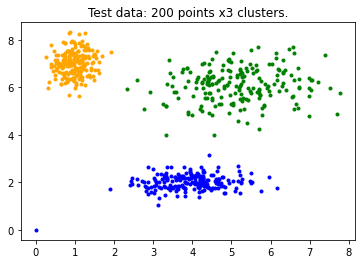

In [13]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

### 2. Clustering

Above is our test data. We see three distinct blobs. However, what would happen if we didn't know how many clusters we should expect? Perhaps if the data were not so clearly clustered? Let's try clustering our data several times, with between 2 and 9 clusters.

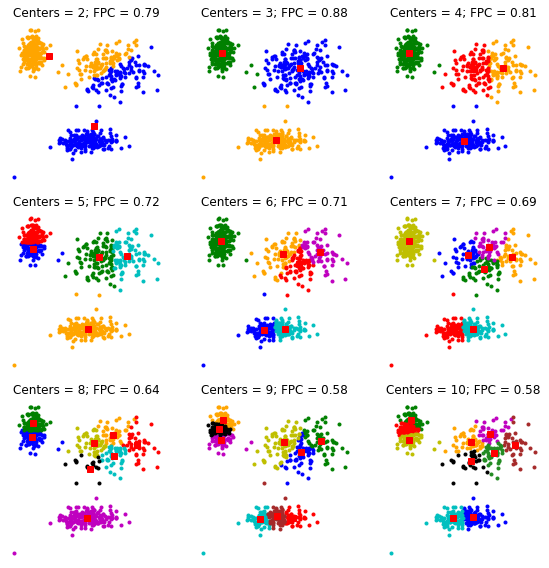

In [14]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

### 3. The fuzzy partition coefficient (FPC)

The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric
which tells us how cleanly our data is described by a certain model. Next we
will cluster our set of data - which we know has three clusters - several
times, with between 2 and 9 clusters. We will then show the results of the
clustering, and plot the fuzzy partition coefficient. When the FPC is
maximized, our data is described best.

Text(0, 0.5, 'Fuzzy partition coefficient')

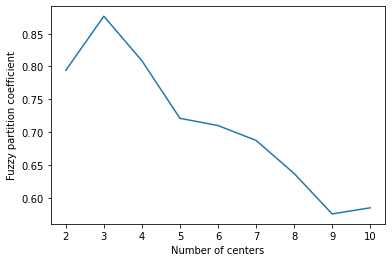

In [15]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

As we can see, the ideal number of centers is 3. This isn’t news for our contrived example, but having the FPC available can be very useful when the structure of your data is unclear.

### 4. Classifying New Data

Now that we can cluster data, the next step is often fitting new points into
an existing model. This is known as prediction. It requires both an existing
model and new data to be classified.

We know our best model has three cluster centers. We’ll rebuild a 3-cluster model for use in prediction, generate new uniform data, and predict which cluster to which each new data point belongs.

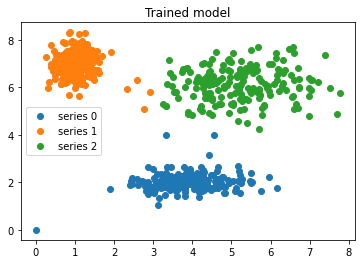

In [16]:
# Regenerate fuzzy model with 3 cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

### 5. Prediction

Finally, we generate uniformly sampled data over this field and classify it via `cmeans_predict`, incorporating it into the pre-existing model.

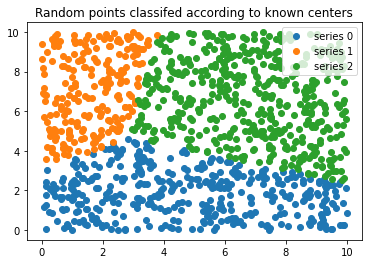

In [17]:
# Generate uniformly sampled data spread across the range [0, 10] in x and y
newdata = np.random.uniform(0, 1, (1100, 2)) * 10

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, 4, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
ax3.legend()

plt.show()

#### 6. Try a few different randomly generated data sets. Are there some sets where one technique gives more appropriate looking answers than the other? Why?